In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
#engine.execute('SELECT * FROM  Measurement').fetchall()

In [10]:
engine.execute('SELECT * FROM  Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
engine.execute('SELECT * FROM  Station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [12]:
engine.execute('SELECT * FROM  Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
# Design a query to retrieve the last 12 months of precipitation data and plot the results
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date = str(most_recent_date)[2:-3]
print(most_recent_date)

2017-08-23


In [14]:
# Calculate the date 1 year ago from from most recent date in database
last_year = str(eval(most_recent_date[0:4])-1) + most_recent_date[4:]
print(last_year)

2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores & sort the dataframe by date
last_yr_prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= last_year).filter(measurement.date <= most_recent_date).order_by(measurement.date).all()



In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column  
prcp_df = pd.DataFrame(data=last_yr_prcp)
prcp_df.set_index("date", inplace=True)
prcp_df.rename(columns={"prcp": "Precipitation"}, inplace=True)
prcp_df.head()

,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [17]:
prcp_df.dropna(axis=0, how="any", inplace=True)
prcp_df.head()

,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


Plotting Precipitation data...


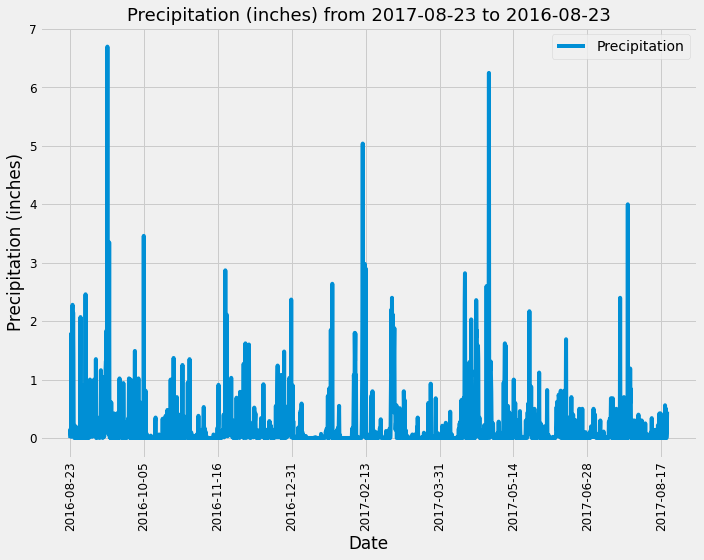

In [18]:
# use Pandas Plotting with Matplotlib to plot the data 

print("Plotting Precipitation data...")
prcp_df.plot(figsize=(10,8), fontsize=12, rot=90)
plt.title(f"Precipitation (inches) from {most_recent_date} to {last_year}", fontsize=18)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")

plt.tight_layout()
plt.savefig("Images/precipitation.png")
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
num_station = session.query(station).count()
num_station

9

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
                  order_by(func.count(measurement.station).desc()).\
                  group_by(measurement.station).\
                  all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station = active_stations[0][0]
print (f"The most active station is {most_active_station}.")

The most active station is USC00519281.


In [23]:
# calculate lowest temp recorded at the most active station
lowest_temp = session.query(func.min(measurement.tobs)).\
              filter(measurement.station == most_active_station).scalar()
              
print(f"Lowest temperature: {lowest_temp} degrees Fahrenheit.")


Lowest temperature: 54.0 degrees Fahrenheit.


In [24]:
# calculate highest temp recorded at the most active station 
highest_temp = session.query(func.max(measurement.tobs)).\
              filter(measurement.station == most_active_station).scalar()

print(f"Highest temperature: {highest_temp} degrees Fahrenheit.")


Highest temperature: 85.0 degrees Fahrenheit.


In [25]:
# calculate average temp recorded at the most active station 
avg_temp = session.query(func.avg(measurement.tobs)).\
              filter(measurement.station == most_active_station).scalar()

print(f"Average temperature: {round(avg_temp, 2)} degrees Fahrenheit.")

Average temperature: 71.66 degrees Fahrenheit.


Plotting Temperature Observations data...


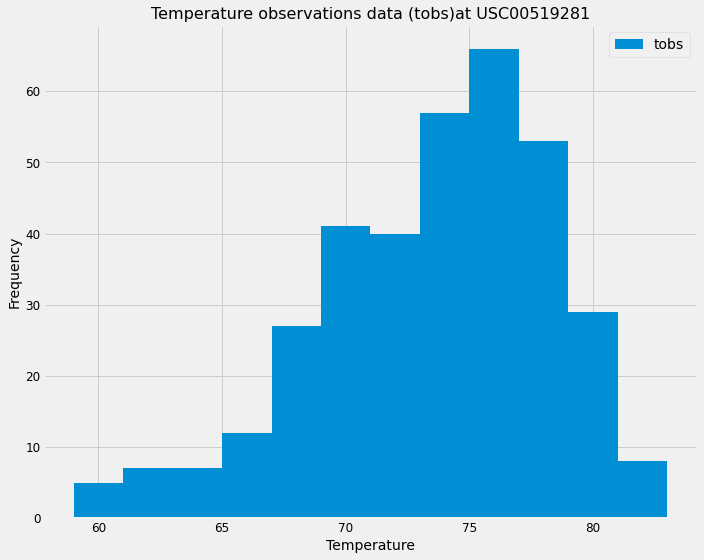

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active = pd.DataFrame(session.query(measurement.tobs).\
                                filter((measurement.station == most_active_station)\
                                        & (measurement.date >= last_year)\
                                        & (measurement.date <= most_recent_date)).all())
print("Plotting Temperature Observations data...")
most_active.plot(kind="hist", figsize=(10,8), bins=12, legend=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Temperature", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(f"Temperature observations data (tobs)at {most_active_station}", fontsize=16)

plt.tight_layout()
plt.savefig("Images/station-histogram.png")
plt.show()

# Close session

In [27]:
# Close Session
session.close()